In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000]/255. , X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255.

In [7]:
X_valid.shape

(5000, 28, 28)

In [8]:
X_train.shape

(55000, 28, 28)

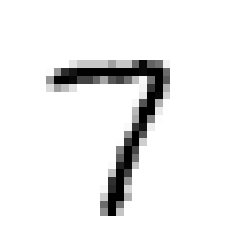

In [9]:
# lets  visualize the dataset

plt.imshow(X_train[100], cmap='binary')
plt.axis("off")
plt.show()

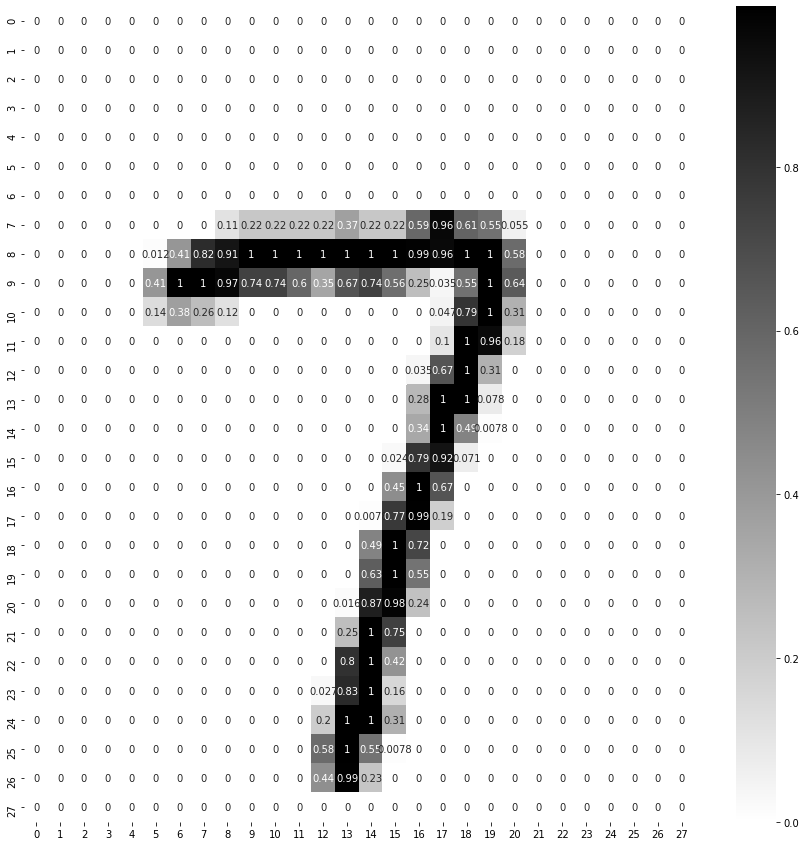

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[100],annot=True, cmap='binary')

In [11]:
y_train[100]

7

In [12]:
Layers = [tf.keras.layers.Flatten(input_shape=[28,28], name = "inputlayer"),
          tf.keras.layers.Dense(300, activation='relu', name = "hiddenlayer1"),
          tf.keras.layers.Dense(100, activation='relu', name = 'hiddenlayer2'),
          tf.keras.layers.Dense(10, activation='softmax', name = "outputlayer")
          ]

In [13]:
model_cf = tf.keras.models.Sequential(Layers)

In [14]:
model_cf.layers

In [15]:
model_cf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputlayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenlayer1 (Dense)         (None, 300)               235500    
_________________________________________________________________
hiddenlayer2 (Dense)         (None, 100)               30100     
_________________________________________________________________
outputlayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Analyze the layers and weights  

hidden1 = model_cf.layers[1]
hidden1.name

'hiddenlayer1'

In [17]:
hidden1.get_weights()

[array([[ 0.01338021, -0.024857  ,  0.04194655, ..., -0.05410514,
          0.06652531, -0.06203479],
        [-0.04941167,  0.05213331,  0.02804601, ...,  0.04291491,
         -0.03362638,  0.03552378],
        [ 0.06808272, -0.03575566, -0.00494687, ..., -0.0364223 ,
         -0.04560728, -0.01291871],
        ...,
        [ 0.04229318,  0.01284216,  0.04871789, ..., -0.01711563,
         -0.0727113 , -0.02441713],
        [ 0.00279857, -0.01287291, -0.02978982, ..., -0.06216117,
          0.05127591, -0.00390153],
        [-0.04485172,  0.06092364,  0.00587822, ...,  0.0368655 ,
          0.06064375, -0.0152747 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights.shape

(784, 300)

In [20]:
biases.shape

(300,)

In [21]:
Loss_function = "sparse_categorical_crossentropy"
optimizer = 'SGD'
metrics = "accuracy"

model_cf.compile(loss=Loss_function, optimizer=optimizer, metrics=metrics)

In [22]:
Epoches = 30
Validation_set = (X_valid, y_valid)

history = model_cf.fit(X_train, y_train, epochs = Epoches, validation_data = Validation_set, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6295 - accuracy: 0.8327 - val_loss: 0.3093 - val_accuracy: 0.9166
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2912 - accuracy: 0.9180 - val_loss: 0.2401 - val_accuracy: 0.9352
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2382 - accuracy: 0.9321 - val_loss: 0.2080 - val_accuracy: 0.9414
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2025 - accuracy: 0.9417 - val_loss: 0.1765 - val_accuracy: 0.9512
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1761 - accuracy: 0.9498 - val_loss: 0.1600 - val_accuracy: 0.9560
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1554 - accuracy: 0.9561 - val_loss: 0.1417 - val_accuracy: 0.9592
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1387 - accuracy: 0.9600 - val_loss: 0.1334 - val_accuracy:

Saving the model

In [23]:
# import time

# def SaveModel_path(model_dir = "Trained_model"):
#     os.makedirs(model_dir,exist_ok=True)
#     filename = time.strftime('model_%Y_%m_%d_%H_%M_%S_.h5')
#     model_path = os.path.join(model_dir, filename)
#     print(f"model {filename} will be saved at {model_path}")
#     return model_path

In [26]:
model_cf.save("Model.h5")

In [27]:
  history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [28]:
history.history

{'loss': [0.6294766068458557,
  0.2912497818470001,
  0.23822557926177979,
  0.20250806212425232,
  0.17614755034446716,
  0.15535937249660492,
  0.13869424164295197,
  0.12540167570114136,
  0.11375971138477325,
  0.10402266681194305,
  0.09577418118715286,
  0.08788895606994629,
  0.08178609609603882,
  0.07569968700408936,
  0.07039222866296768,
  0.06546038389205933,
  0.06106342002749443,
  0.05733632668852806,
  0.05373784527182579,
  0.05032694339752197,
  0.04734914004802704,
  0.044245313853025436,
  0.04192635416984558,
  0.03950827941298485,
  0.03688795119524002,
  0.03488454222679138,
  0.03292715176939964,
  0.03105585277080536,
  0.029565174132585526,
  0.027620479464530945],
 'accuracy': [0.8327090740203857,
  0.9179636240005493,
  0.9321272969245911,
  0.9416727423667908,
  0.9498363733291626,
  0.9561454653739929,
  0.9600181579589844,
  0.9642545580863953,
  0.9680181741714478,
  0.97079998254776,
  0.9729090929031372,
  0.9751272797584534,
  0.9773454666137695,
  0.

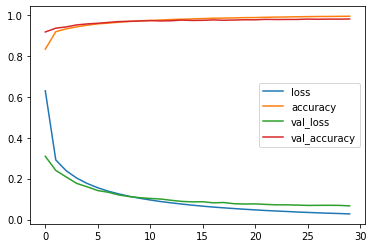

In [29]:
pd.DataFrame(history.history).plot()

In [30]:
model_cf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.9791


[0.06593675911426544, 0.9790999889373779]

In [31]:
X_test[:3].shape

(3, 28, 28)

In [32]:
X_new = X_test[:3]
y_pred = model_cf.predict(X_new)
y_pred.round(3)

array([[0.   , 0.   , 0.   , 0.002, 0.   , 0.   , 0.   , 0.998, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.001,
        0.   ]], dtype=float32)

In [33]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1], dtype=int64)

In [34]:
y_test_new = y_test[:3]
y_test_new

array([7, 2, 1], dtype=uint8)

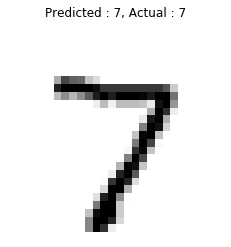

******************************


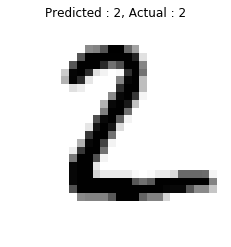

******************************


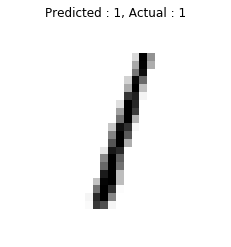

******************************


In [36]:
for data,pred,actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap='binary')
    plt.title(f"Predicted : {pred}, Actual : {actual}")
    plt.axis("off")
    plt.show()
    print('*'*30)


Loading the saved model

In [37]:
loaded_model = tf.keras.models.load_model('model.h5')

In [38]:
loaded_model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0659 - accuracy: 0.9791


[0.06593675911426544, 0.9790999889373779]

In [39]:
loaded_model.predict(X_test)

array([[1.0697499e-06, 4.3950749e-07, 1.3774409e-05, ..., 9.9781406e-01,
        1.2028733e-05, 5.1373645e-05],
       [4.5662088e-07, 2.0817633e-05, 9.9992049e-01, ..., 7.6538142e-12,
        2.2240783e-06, 1.4475243e-11],
       [1.6992641e-06, 9.9822325e-01, 7.2540875e-05, ..., 4.3095861e-04,
        6.3079415e-04, 1.5647349e-05],
       ...,
       [9.7446573e-10, 8.8552310e-10, 3.5989087e-11, ..., 2.2504512e-06,
        8.4503581e-06, 9.9269473e-06],
       [3.9525476e-09, 4.3866333e-10, 4.9633055e-11, ..., 1.9488526e-10,
        8.9114992e-06, 1.7676596e-11],
       [1.6502235e-06, 2.2274307e-10, 5.3811146e-08, ..., 5.1838677e-12,
        4.2118998e-08, 5.9277622e-10]], dtype=float32)

In [40]:
print(X_test[3].shape)

(28, 28)


In [41]:
from keras.preprocessing.image import img_to_array , load_img

In [59]:

# img = cv2.imread("image-7.png",0)
# print(img.shape)

img = load_img("C:/Users/Swati Panchal/Documents/ML_Internship/Digit_Images/img_39.jpg",grayscale=True, target_size=(28, 28))
print(img)
img = img_to_array(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=28x28 at 0x21C98A0C608>


In [60]:
img = img.reshape((28,28))
img /=255.

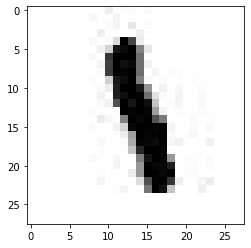

In [61]:
plt.imshow(img, cmap='binary')

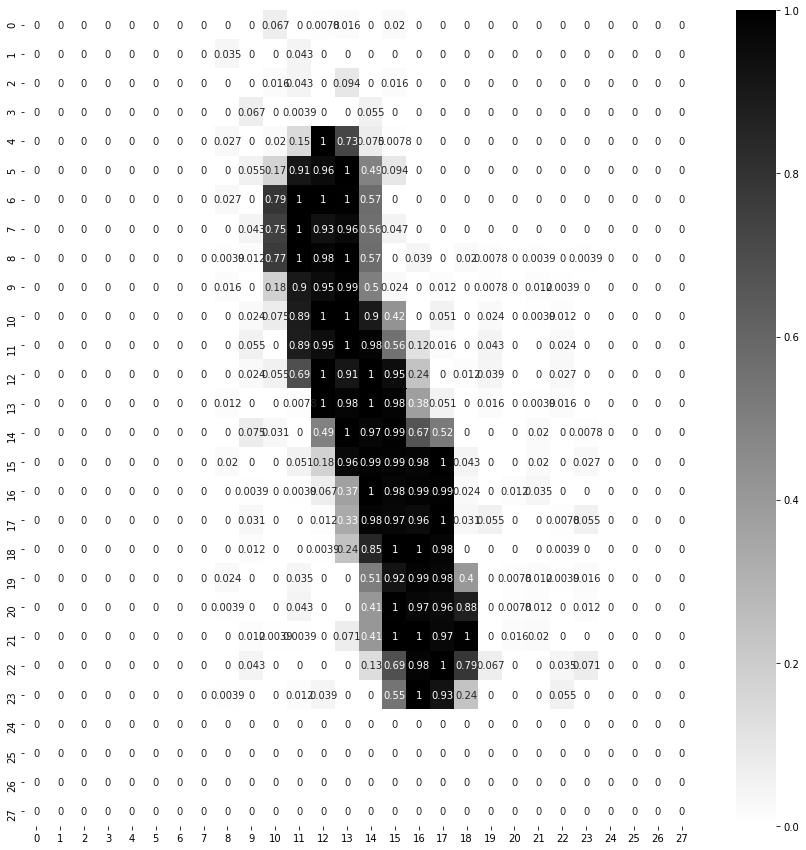

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(img, annot=True, cmap = 'binary')

In [63]:
img = np.expand_dims(img, axis=0)

In [64]:
img.ndim

3

In [65]:
img.shape

(1, 28, 28)

In [66]:
pred = loaded_model.predict(img)
pred

array([[7.6338331e-11, 9.9896967e-01, 6.5748645e-06, 2.2378108e-04,
        3.6924446e-04, 7.7376990e-06, 5.2458824e-07, 1.6133548e-05,
        3.5668325e-04, 4.9605758e-05]], dtype=float32)

In [67]:
np.argmax(pred)

1